In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import EarlyStopping

In [22]:
df = pd.read_csv("../Data/train.csv", low_memory=False)
df["Num_of_Loan"] = df["Num_of_Loan"].str.replace("_", "")
df["Num_of_Loan"] = pd.to_numeric(df["Num_of_Loan"])

df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].str.replace("_", "")
df["Num_of_Delayed_Payment"] = pd.to_numeric(df["Num_of_Delayed_Payment"])

mask = df.Num_of_Delayed_Payment.notna()
features = ["Num_of_Loan", "Num_of_Delayed_Payment", "Interest_Rate"]
X = df.loc[mask, features].to_numpy()

y = df.loc[mask, "Credit_Score"].to_numpy()

In [36]:
df[features].describe()

,Num_of_Loan,Num_of_Delayed_Payment,Interest_Rate
count,100000.000000,92998.000000,100000.000000
mean,3.009960,30.923342,72.466040
std,62.647879,226.031892,466.422621
min,-100.000000,-3.000000,1.000000
25%,1.000000,9.000000,8.000000
50%,3.000000,14.000000,13.000000
75%,5.000000,18.000000,20.000000
max,1496.000000,4397.000000,5797.000000


In [23]:
le = LabelEncoder()
le.fit(y)

y_norm = le.transform(y)

In [24]:
mask = np.any(X>0, axis=1)
X = X[mask]
y_norm = y_norm[mask]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size=0.2)

In [26]:
n_input = X.shape[-1]
n_output = np.unique(y_norm).size

In [27]:
Arch = [
    Dense(units=n_input, activation='relu'),
    Dense(units=n_output, activation='linear')
]

model = Sequential(Arch)

In [28]:
opt = Adam(learning_rate=0.01)

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=opt)

In [29]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1860/1860 [==============================] - 2s 913us/step - loss: 2.1402 - val_loss: 1.3968
Epoch 2/100
1860/1860 [==============================] - 2s 857us/step - loss: 0.9798 - val_loss: 0.8927
Epoch 3/100
1860/1860 [==============================] - 2s 845us/step - loss: 0.8825 - val_loss: 0.8708
Epoch 4/100
1860/1860 [==============================] - 2s 850us/step - loss: 0.8798 - val_loss: 0.8758
Epoch 5/100
1860/1860 [==============================] - 2s 846us/step - loss: 0.8841 - val_loss: 0.8727
Epoch 6/100
1860/1860 [==============================] - 2s 845us/step - loss: 0.8780 - val_loss: 0.8926
Epoch 7/100
1860/1860 [==============================] - 2s 894us/step - loss: 0.8699 - val_loss: 0.8482
Epoch 8/100
1860/1860 [==============================] - 2s 854us/step - loss: 0.8684 - val_loss: 0.8674
Epoch 9/100
1860/1860 [==============================] - 2s 867us/step - loss: 0.8707 - val_loss: 0.9327
Epoch 10/100
1860/1860 [==============================]

In [30]:
logits = model(X_train)
f_X = tensorflow.nn.softmax(logits)

In [31]:
y_hat = np.argmax(f_X, axis=1)

In [32]:
np.unique(np.argmax(f_X, axis=1), return_counts=1)

(array([0, 1, 2], dtype=int64), array([ 9573, 18575, 46250], dtype=int64))

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.46      0.33      0.39     13332
           1       0.59      0.51      0.55     21616
           2       0.62      0.73      0.67     39450

    accuracy                           0.59     74398
   macro avg       0.56      0.52      0.53     74398
weighted avg       0.58      0.59      0.58     74398



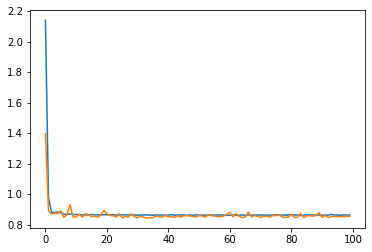

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
#plt.xlim(0,20)